In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
fmnist_data = keras.datasets.fashion_mnist

In [3]:
(x_train, y_train), (x_test, y_test) = fmnist_data.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 5us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 195s 7us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 5us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 40s 9us/step


In [4]:
x_train, x_test = x_train/255.0, x_test/255.0

In [5]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(75, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

D:\Learning\Python\Tasks\venv\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 75)             │         7,575 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           760 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 86,835 (339.20 KB)

 Trainable params: 86,835 (339.20 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
weights, bias = model.layers[1].get_weights()

In [8]:
weights

array([[-0.03931152, -0.07644507,  0.07158971, ...,  0.03307027,
        -0.05219571,  0.04317932],
       [ 0.06792939,  0.06197789,  0.01476463, ...,  0.04682225,
         0.01901622,  0.00554516],
       [ 0.0508084 , -0.07178643,  0.0203625 , ..., -0.0372044 ,
         0.01630287, -0.03401962],
       ...,
       [ 0.07513373,  0.01970529, -0.03855773, ...,  0.0699726 ,
        -0.02672014, -0.0632855 ],
       [ 0.01343095, -0.03505435,  0.02663569, ..., -0.051937  ,
         0.05843663, -0.03840664],
       [ 0.00564332,  0.00138564,  0.04373601, ...,  0.04973006,
         0.02832221, -0.07071055]], dtype=float32)

In [9]:
bias

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [10]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [11]:
history = model.fit(x_train, y_train, epochs=50, validation_split=0.15)

Epoch 1/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6568 - loss: 1.0671 - val_accuracy: 0.7969 - val_loss: 0.5703
Epoch 2/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 2s 944us/step - accuracy: 0.8162 - loss: 0.5258 - val_accuracy: 0.8234 - val_loss: 0.4903
Epoch 3/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 2s 939us/step - accuracy: 0.8358 - loss: 0.4716 - val_accuracy: 0.8363 - val_loss: 0.4535
Epoch 4/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 1s 924us/step - accuracy: 0.8476 - loss: 0.4362 - val_accuracy: 0.8428 - val_loss: 0.4489
Epoch 5/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 2s 927us/step - accuracy: 0.8557 - loss: 0.4129 - val_accuracy: 0.8518 - val_loss: 0.4211
Epoch 6/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 1s 894us/step - accuracy: 0.8578 - loss: 0.4023 - val_accuracy: 0.8446 - val_loss: 0.4348
Epoch 7/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 2s 951us/step - accuracy: 0.8643 - loss: 0.3853 - val_accuracy: 0.8620 - val_loss: 0.3898
Epoch 8/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 2s 929us/step - accuracy: 0.8680 - l

In [12]:
print(history.history)

{'accuracy': [0.7444902062416077, 0.8201568722724915, 0.8389803767204285, 0.8466274738311768, 0.8546274304389954, 0.8590587973594666, 0.8646470308303833, 0.8673921823501587, 0.8712549209594727, 0.8730587959289551, 0.8758431077003479, 0.8779019713401794, 0.8812549114227295, 0.8830784559249878, 0.8856470584869385, 0.8872156739234924, 0.8884902000427246, 0.8909608125686646, 0.8922156691551208, 0.8936078548431396, 0.8949215412139893, 0.8954901695251465, 0.8972548842430115, 0.8994705677032471, 0.8998235464096069, 0.9015490412712097, 0.9031176567077637, 0.9048431515693665, 0.9062548875808716, 0.9075098037719727, 0.9081764817237854, 0.9089411497116089, 0.9118039011955261, 0.9100784063339233, 0.9123725295066833, 0.9138627648353577, 0.9148039221763611, 0.9159411787986755, 0.9174509644508362, 0.9187647104263306, 0.9184314012527466, 0.9197843074798584, 0.9203725457191467, 0.9210784435272217, 0.9213725328445435, 0.9229411482810974, 0.9249215722084045, 0.9260784387588501, 0.9258038997650146, 0.9260

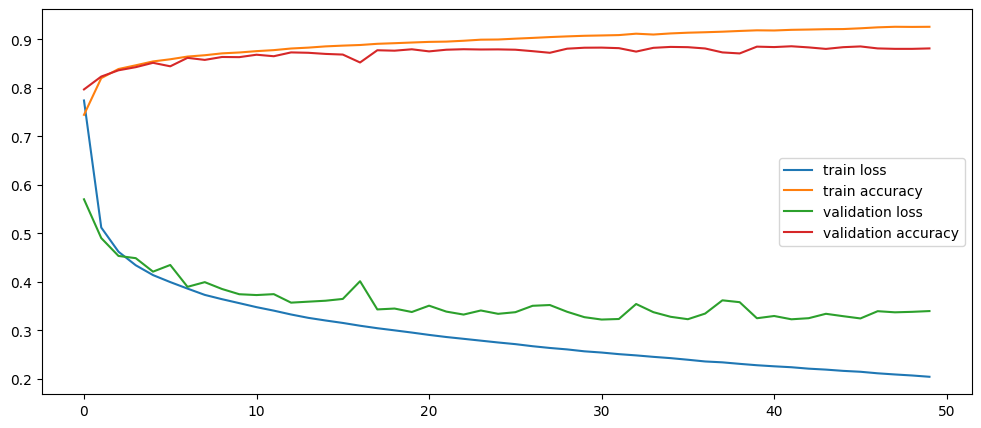

In [13]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(history.history["loss"], label="train loss")
ax.plot(history.history["accuracy"], label="train accuracy")
ax.plot(history.history["val_loss"], label="validation loss")
ax.plot(history.history["val_accuracy"], label="validation accuracy")
ax.legend()